# Lab 6. Regularization

#### Table of contents

1. Overview
2. Star type
3. Prepare the data
4. Normal equation & regularization
5. Logistic regression & regularization

## 1. Overview

In this lab we will explore the stars dataset with various machine learning methods and investigate the effect of regularization.

## 2. Star type

Stars are classified into 6 types, and we will assign a number to each as:

- Brown Dwarf (Type = 0)
- Red Dwarf (Type = 1)
- White Dwarf (Type = 2)
- Main Sequence (Type = 3)
- Supergiant (Type = 4)
- Hypergiant (Type = 5)

A brown dwarf is a type of substellar object that has a mass between those of the heaviest gas giant planets and the least massive stars. By contrast, a red dwarf is the smallest and coolest kind of star on the main sequence.
In astronomy, the main sequence is a continuous and distinctive band of stars that appears on plots of stellar color versus brightness. These color-magnitude plots are known as Hertzsprung-Russell diagrams after their co-developers, Ejnar Hertzsprung and Henry Norris Russell. Stars on this band are known as main-sequence stars [Wikipedia]. Stars can be classified with respect to various features such as:

- Temperature (the surface temperatures stars)
- Luminosity (the Luminosity of stars calculated with respect to sun)
- Radius (the Radius of stars calculated with respect to sun)
- Absolute magnitude (the absolute visual magnitude of stars

We will develop various machine learning models to predict properties and classify stars and appreaciate the effect of regularization on the models.

## 3. Prepare the data

Let first load the data.

In [1]:
import pandas as pd
s0 = pd.read_csv('stars.csv')
s0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [2]:
s0.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [3]:
s0.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. We can use seaborn to represent the scatter matrix, here called pair plot. The variable `hue` maps the data to different colors.

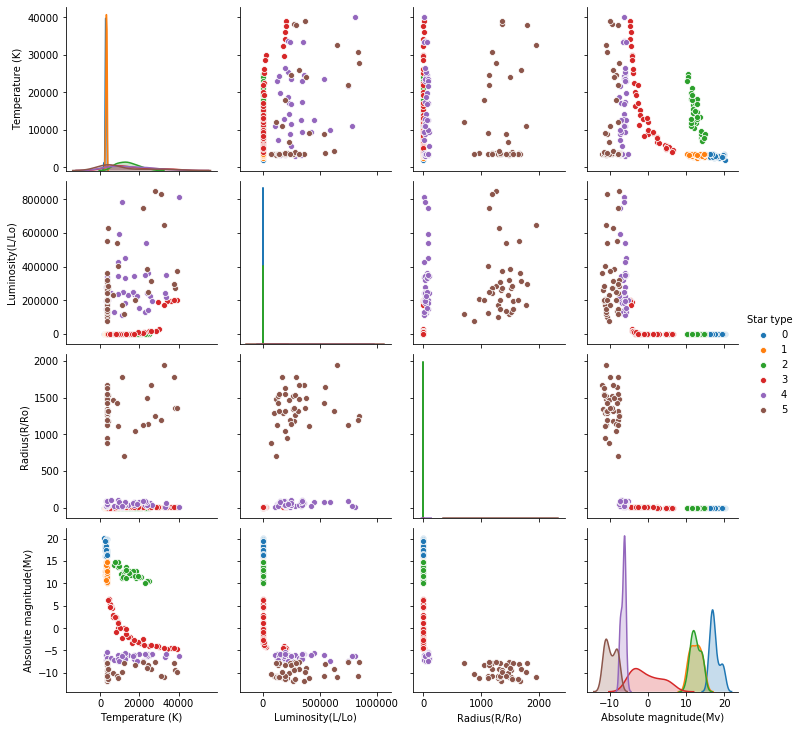

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(data = s0, hue = "Star type")

__Q.1.__ Define the DataFrame `t3` that contains all data from the original DataFrame `s0` but only for `Star type` equal to 3 (1 mark).

In [5]:
### BEGIN SOLUTION
### END SOLUTION

Let's represent the absolute magnitude as a function of the temperature for star type 3.

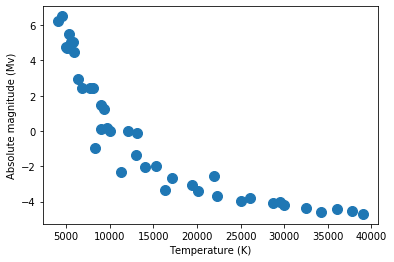

In [10]:
x0 = t3['Temperature (K)']
y0 = t3['Absolute magnitude(Mv)']

plt.plot(x0,y0,marker='.',lw=0,ms=20)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

We propose in the following to fit this data with various non-linear features.

## 4. Normal equation & regularization

We would like to solve the linear regression problem with the normal equation. The normal equation provides the values of the parameters $\Theta = \theta_0,\theta_1, \dots, \theta_n$ directly via an analytical solution of the minimization of the cost function. The values of $\Theta$ that minimize the cost function are given as:

$\Theta = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$

Let's first prepare the arrays containing the design matrix $X$ and the target values $y$. We will start from the Series $x_0$ and $y_0$ defined above.

In [11]:
import numpy as np

x0_tmp = np.array(x0)
X = np.c_[np.ones(x0_tmp.shape[0]),x0_tmp.ravel()] # Here we add a column of ones
y = np.array(y0)
print(X.shape)
print(X[:5])

(40, 2)
[[1.0000e+00 3.9000e+04]
 [1.0000e+00 3.0000e+04]
 [1.0000e+00 1.5276e+04]
 [1.0000e+00 9.7000e+03]
 [1.0000e+00 5.8000e+03]]


Since the data is not linear, we will expand features into polynomial series. We will use polynomial features from sklearn library. We just expand features to 2nd order such that the hypothesis becomes: $h = \theta_0+\theta_1x+\theta_2x^2$. Hence the columns of the design matrix should be ones, $x$ (the temperatures) and $x^2$ (the squared temperatures).

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=True)
X0 = X[:,1].reshape(-1, 1)
X_poly = poly_features.fit_transform(X0)

print(X_poly.shape)
print(X_poly[:5])

(40, 3)
[[1.00000000e+00 3.90000000e+04 1.52100000e+09]
 [1.00000000e+00 3.00000000e+04 9.00000000e+08]
 [1.00000000e+00 1.52760000e+04 2.33356176e+08]
 [1.00000000e+00 9.70000000e+03 9.40900000e+07]
 [1.00000000e+00 5.80000000e+03 3.36400000e+07]]


__Q.2.__ Complete the function below that takes in the design matrix $X$ and the target values $y$ and returns the parameters $\Theta$ that minimize the cost via the normal equation. The dot product between two vactors/matrices `A`, `B` can be achieved as `A.dot(B)`. The transpose of a vector/matrix `A` can be done as `A.T`. The inverse of a matrix `A` is `np.linalg.inv(A)` (2 marks).

In [13]:
def NormalEq(X,y):
    ### BEGIN SOLUTION
    ### END SOLUTION
    return ts

ts = NormalEq(X_poly,y)
print(ts)

[ 8.66985365e+00 -9.28017579e-04  1.58621643e-08]


We can now plot the result. The hypothesis can be computed as $h = \Theta \cdot X$.

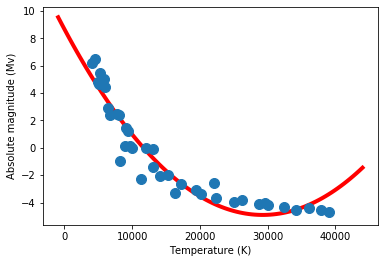

In [14]:
# Let's define some points to plot the fit over
x_fit = np.linspace(min(x0)-5000,max(x0)+5000,100)

# Here we create polynomial features based on the fitting points
Xfit = x_fit.ravel()[:,np.newaxis]
Xfit_poly = poly_features.fit_transform(Xfit)

# We compute the hypothesis 
y_fit = Xfit_poly.dot(ts)

# Here the plots
plt.plot(x_fit,y_fit,marker=None,lw=4,c='r')
plt.plot(x0,y0,marker='.',lw=0,ms=20)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

The regularized normal equation can be simply extended as:

$\Theta = \left(X^T\cdot X+\lambda I'\right)^{-1}\cdot X^T\cdot Y$

with $I'$ the identity matrix with the first element zeroed as $I[0;0]=0$.

__Q.3.__ Define below the regularized normal equation. This function takes in the design matrix $X$, the target values $y$ and the coefficient $\lambda$. Numpy provides the identity matrix as `np.identity(n)` with `n` the size of the squared matrix. Do not forget to set the first value to zero (`I[0][0] = 0`) (3 marks).

In [19]:
def NormalEqR(X,y,lmd):
    m,n = X.shape
    ### BEGIN SOLUTION
    ### END SOLUTION
    return ts

We will now vary the coefficient of regularization $\lambda$ and plot the result on the same figure.

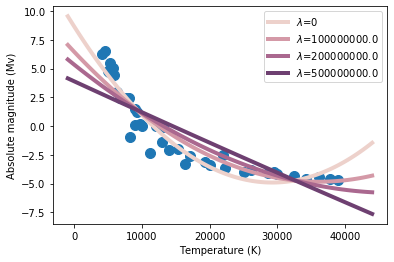

In [21]:
fig, axes = plt.subplots();

# The data
axes.plot(x0,y0,marker='.',lw=0,ms=20)
axes.set_xlabel('Temperature (K)')
axes.set_ylabel('Absolute magnitude (Mv)')

# Here some value for lambda
lmd_list = [0,1e8,2e8,5e8]

# We define a list of colors for each lambda
clist = sns.color_palette(sns.cubehelix_palette(len(lmd_list)+1))

# We define points for the fits and generate the polynomial features
x_fit = np.linspace(min(x0)-5000,max(x0)+5000,100)
Xfit = x_fit.ravel()[:,np.newaxis]
Xfit_poly = poly_features.fit_transform(Xfit)
    
count = 0
# We loop over lambda, solve the normal equation and evaluate the hypothesis
for lmd in lmd_list:
    ts = NormalEqR(X_poly,y,lmd)
    y_fit = Xfit_poly.dot(ts)
    axes.plot(x_fit,y_fit,marker=None,lw=4,c=clist[count],label='$\lambda$='+str(lmd))
    count += 1
    
axes.legend()
plt.show()

You should appreciate above the effect of $\lambda$ on the polynomial fit. As we increase $\lambda$, the hypothesis should tend toward a simple linear regression.

However, we can easily see here from the data that the absolute magnitude is inversly proportional to the temperature. Hence we could define the hypothesis as $h = \theta_0+\theta_1/x$. Here is what we get.

[-5.86917038e+00  5.67810687e+04]


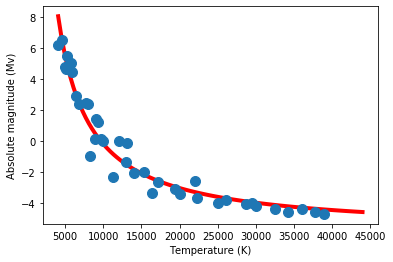

In [22]:
# We define the design matrix
X_inv = 1/X

# Solve the unregularized (lmd = 0) normal equation
ts = NormalEqR(X_inv,y,0)
print(ts)

# Let's create some points to plot the fit over
x_fit = np.linspace(min(x0),max(x0)+5000,100)

# Here we create polynomial features based on the fitting points
Xfit_inv = x_fit.ravel()[:,np.newaxis]
Xfit_inv = 1/Xfit_inv
Xfit_inv = np.c_[np.ones(Xfit_inv.shape[0]),Xfit_inv.ravel()]

# We compute the hypothesis 
y_fit = Xfit_inv.dot(ts)

# Here the plots
plt.plot(x_fit,y_fit,marker=None,lw=4,c='r')
plt.plot(x0,y0,marker='.',lw=0,ms=20)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

## 5. Logistic regression & regularization

We will use logistic regression to classify stars between Brown (type 0) and Red (type 1) Dwarves based on luminosity and temperature data. Let's first prepare the data and remove few outliers.

__Q.4.__ Define the DataFrame `t0` that contains all data from the original DataFrame `s0` but only for `Star type` equal to 0 AND only keep rows with `Luminosity(L/Lo) < 0.005` and `Temperature (K) > 2500` (2 marks).

In [23]:
### BEGIN SOLUTION
### END SOLUTION

__Q.5.__ Define the DataFrame `t1` that contains all data from the original DataFrame `s0` but only for `Star type` equal to 1 AND only keep rows with `Luminosity(L/Lo) < 0.015` (2 marks).

In [24]:
### BEGIN SOLUTION
### END SOLUTION

Let's plot the luminosity as a function of the temperature for the two types of stars.

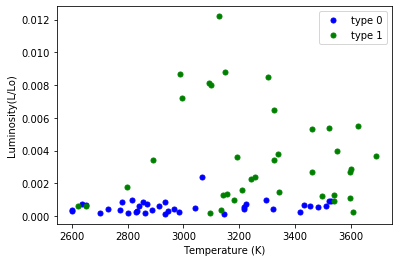

In [87]:
plt.plot(t0['Temperature (K)'],t0['Luminosity(L/Lo)'],marker='.',lw=0,color='b',ms=10,label='type 0')
plt.plot(t1['Temperature (K)'],t1['Luminosity(L/Lo)'],marker='.',lw=0,color='g',ms=10,label='type 1')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.legend()
plt.show()

We can now define the design matrix $X$ and target value array $y$. The hypothesis will be of the form $h = \theta_0+\theta_1x_1+\theta_2x_2$ with $x_1$ the temperatures and $x_2$ the luminosities.

In [29]:
X0 = t0[['Temperature (K)','Luminosity(L/Lo)']]
X1 = t1[['Temperature (K)','Luminosity(L/Lo)']]
X = pd.concat([X0, X1])
X = np.c_[np.ones(X.to_numpy().shape[0]), X.to_numpy()] # We add a column of ones
print('Head of the design matrix')
print(X[:5])

Y0 = t0[['Star type']]
Y1 = t1[['Star type']]
y = pd.concat([Y0, Y1])
y = y.values.ravel()

print('\nShape of the design matrix and target values')
print(X.shape,y.shape)
print('\nFull target values')
print(y)

Head of the design matrix
[[1.000e+00 3.068e+03 2.400e-03]
 [1.000e+00 3.042e+03 5.000e-04]
 [1.000e+00 2.600e+03 3.000e-04]
 [1.000e+00 2.800e+03 2.000e-04]
 [1.000e+00 2.840e+03 6.500e-04]]

Shape of the design matrix and target values
(75, 3) (75,)

Full target values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


Below some functions from previous labs. Review them carefully.

In [78]:
def hypothesis(ts,X):
    m,n = X.shape
    h = [] # initialize the hypothesis list
    h = [sum([ts[i]*X[j][i] for i in range(n)]) for j in range(m)]
    h = [1.0/(1.0+np.exp(-hi)) for hi in h]
    return h

def standard_multi(X):
    m,n = X.shape
    X_std = np.ones(X.shape)
    mu,std = [1],[1] 
    for i in range(1,n):
        mui = np.mean(X[:,i])
        stdi = np.std(X[:,i])
        mu.append(mui)
        std.append(stdi)
        for j in range(m): # loop over rows
            X_std[j][i] = (X[j][i]-mui)/stdi
    return X_std, mu, std

def f1(h,X,y):
    m,n = X.shape
    tn,fp,fn,tp = 0,0,0,0
    for i in range(m):
        if y[i] == 1:
            if h[i] >= 0.5: tp += 1
            if h[i] < 0.5: fn += 1
        if y[i] == 0:
            if h[i] < 0.5: tn += 1
            if h[i] >= 0.5: fp += 1
    f1_score = tp/(tp+(fn+fp)/2)
    return f1_score

def gd(X,y,Niter,alpha,lmd):
    ts = [0]*X.shape[1]
    for step in range(1,Niter):
        h = hypothesis(ts,X)
        ts = update_ts(ts,alpha,h,X,y,lmd)
        h = hypothesis(ts,X)
        if step % int(Niter/4) == 0: print('Step ',step,'/',Niter)
    h = hypothesis(ts,X_poly)
    print('GD converged')
    print('F1 score: ',round(f1(h,X_poly,y),3))
    return ts,Jlist

def plot_db(theta,degree,X,axes,color):
    u = np.linspace(min(X[:,1]),max(X[:,1]), 500)
    v = np.linspace(min(X[:,2]),max(X[:,2]), 500)
    U,V = np.meshgrid(u,v)
    
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    X_poly = poly_features.fit_transform(np.column_stack((U,V)))
    Z = X_poly.dot(theta)
    
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],colors=color)

Note that the definition of the function gradient descent now takes an extra argument the regularization coefficient `lmd` which is then provided to the function `update_ts` that you will define below.

__Q.6.__ Define the function `update_ts` to update the coefficients `ts` including the regularization term. We can keep the previous function and just change the part where the coefficients `ts` are updated. Remember that the regularization is not performed on the first coeffient $\theta_0$ (2 marks).

In [41]:
def update_ts(ts,alpha,h,X,y,lbd):
    m,n = X.shape     
    grads = []
    for i in range(n):
        gradi = 0.0
        for j in range(m):
            gradi += (1.0/m)*(h[j]-y[j])*X[j][i]
        grads.append(gradi)

    ### BEGIN SOLUTION
    ### END SOLUTION
    return ts

To illustrate the procedure we will first standardize the design matrix, then expand the features to polynomial of degree 2. We show below the first few rows of the standardized, expanded design matrix. The polynomial expansion transforms the features [1,$x_1$,$x_2$] to [1,$x_1$,$x_2$,$x_1^2$,$x_1x_2$,$x_2^2$].

In [107]:
X_std,min_list,max_list = standard_multi(X)

degree = 2
poly_features = PolynomialFeatures(degree=degree,include_bias=True)
X_poly = poly_features.fit_transform(X_std[:,1:])
print('First few rows of the standardized polynomial expanded design matrix')
print(X_poly[:5])

First few rows of the standardized polynomial expanded design matrix
[[ 1.         -0.24094805  0.12137986  0.05805596 -0.02924624  0.01473307]
 [ 1.         -0.32640616 -0.60607231  0.10654098  0.19782574  0.36732365]
 [ 1.         -1.77919407 -0.68264622  3.16553153  1.21456011  0.46600587]
 [ 1.         -1.12182397 -0.72093318  1.25848903  0.80876012  0.51974465]
 [ 1.         -0.99034996 -0.54864188  0.98079304  0.54334746  0.30100791]]


Below we minimize the cost via gradient descent, find the best $\Theta$ parameters and plot the decision boudary for a polynomial feature of degree 2.

>>> Start GD (no regularization)
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.857


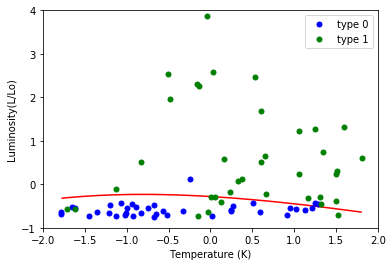

In [109]:
fig, axes = plt.subplots()
axes.set_xlabel('Temperature (K)')
axes.set_ylabel('Luminosity(L/Lo)')
axes.set_xlim(-2,2)
axes.set_ylim(-1,4)

# The data
b_list = np.array(list(map(bool,y)))
axes.plot(X_std[:,1][~b_list],X_std[:,2][~b_list],c='b',label='type 0',marker='.',ms=10,lw=0)
axes.plot(X_std[:,1][b_list],X_std[:,2][b_list],c='g',label='type 1',marker='.',ms=10,lw=0)

print('>>> Start GD (no regularization)')
ts,Jcost = gd(X_poly,y,1000,1,0)
    
plot_db(ts,degree,X_std,axes,['r'])
    
axes.legend()
plt.show()

Let's vary the degree of polynomial feature and plot the corresponding decision boudaries all together on the same plot (still no regularization).


>>> Start GD with hypothesis degree: 1
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.873

>>> Start GD with hypothesis degree: 3
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.841

>>> Start GD with hypothesis degree: 5
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.892

>>> Start GD with hypothesis degree: 7
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.865


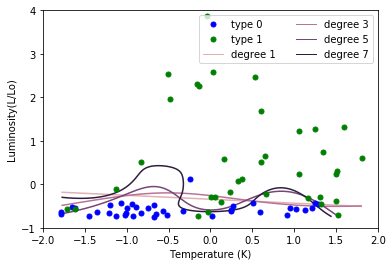

In [110]:
fig, axes = plt.subplots()
axes.set_xlabel('Temperature (K)')
axes.set_ylabel('Luminosity(L/Lo)')
axes.set_xlim(-2,2)
axes.set_ylim(-1,4)

# The data
b_list = np.array(list(map(bool,y)))
axes.plot(X_std[:,1][~b_list],X_std[:,2][~b_list],c='b',label='type 0',marker='.',ms=10,lw=0)
axes.plot(X_std[:,1][b_list],X_std[:,2][b_list],c='g',label='type 1',marker='.',ms=10,lw=0)

# We define a list of degrees
degrees = [1,3,5,7]

# A color list
clist = sns.color_palette(sns.cubehelix_palette(max(degrees)+1))

for degree in degrees:

    # Create the polynomial features
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    X_poly = poly_features.fit_transform(X_std[:,1:])
    
    # Minimize cost via GD
    print('\n>>> Start GD with hypothesis degree:',degree)
    ts,Jcost = gd(X_poly,y,1000,1,0)
    
    # Plot decision boundary
    label = 'degree '+str(degree)
    axes.plot([0],[0],lw=1,c=clist[degree],label=label)
    plot_db(ts,degree,X_std,axes,[clist[degree]])
    
axes.legend(ncol=2)
plt.show()

We note that higher order polynomial not always improve the F1 score. Moreover, the decision boudary might not be accurate because we applied non-linear transformation after standardization and the design matrix is therefore not properly standardized. Improving this would require a better optimization algorithm beyond the scope of this class. The main goal here is to learn how to transform the design matrix with polynomial features, not the actual classification purpose.

Let's now explore the effect of the regularization on the high oder polynomial of degree 7.


>>> Start GD with lambda: 0
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.865

>>> Start GD with lambda: 0.05
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.877

>>> Start GD with lambda: 0.1
Step  250 / 1000
Step  500 / 1000
Step  750 / 1000
GD converged
F1 score:  0.861


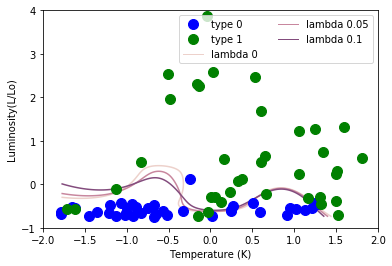

In [111]:
fig, axes = plt.subplots()
axes.set_xlabel('Temperature (K)')
axes.set_ylabel('Luminosity(L/Lo)')
axes.set_xlim(-2,2)
axes.set_ylim(-1,4)

# The data
b_list = np.array(list(map(bool,y)))
axes.plot(X_std[:,1][~b_list],X_std[:,2][~b_list],c='b',label='type 0',marker='.',ms=20,lw=0)
axes.plot(X_std[:,1][b_list],X_std[:,2][b_list],c='g',label='type 1',marker='.',ms=20,lw=0)

# We define a list of lambda
lmd_list = [0,0.05,0.1]

# A color list
clist = sns.color_palette(sns.cubehelix_palette(len(lmd_list)+1))

# Create the polynomial feature of degree 4
degree = 7
poly_features = PolynomialFeatures(degree=degree,include_bias=True)
X_poly = poly_features.fit_transform(X_std[:,1:])
    
count = 0
for lmd in lmd_list:
    
    # Minimize cost via GD
    print('\n>>> Start GD with lambda:',lmd)
    ts,Jcost = gd(X_poly,y,1000,1,lmd)
    
    # Plot decision boundary
    label = 'lambda '+str(lmd)
    axes.plot([0],[0],lw=1,c=clist[count],label=label)
    plot_db(ts,degree,X_std,axes,[clist[count]])
    
    count += 1

axes.legend(ncol=2)
plt.show()

We can see that increasing regularization parameter $\lambda$ somehow flatten the boundary. Finally, note that the magnitude of the regularization coefficient is very different between linear regression and logistic regression.